In [1]:
import pandas as pd

df = pd.read_csv('fish.csv')

In [2]:
df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [3]:
df['Species'].value_counts()

Bream    35
Smelt    14
Name: Species, dtype: int64

In [4]:
df.loc[df['Species']=='Bream','Species'] = 0
df.loc[df['Species']=='Smelt','Species'] = 1

In [5]:
df['Species'] = df['Species'].astype('int32')

In [6]:
df.head()

,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0


In [7]:
features = df[['Weight','Length']]
outcome = df['Species']

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(features, outcome)

KNeighborsClassifier()

In [9]:
print(knn.predict([[240,25]]))

[0]


/home/minsuchae/.pyenv/versions/3.9.0/envs/tensorflow_gpu_2.7.0/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [10]:
train_features = features[:35]
test_features = features[35:]

In [11]:
train_target = outcome[:35]
test_target = outcome[35:]

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_features, train_target)

KNeighborsClassifier()

In [13]:
print(knn.predict(test_features))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
print(test_target.values.reshape(-1))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
from sklearn.model_selection import train_test_split

train_features, test_featues, train_target, test_target = train_test_split(features,outcome,random_state=42)

In [16]:
train_target.value_counts()

0    25
1    11
Name: Species, dtype: int64

In [17]:
test_target.value_counts()

0    10
1     3
Name: Species, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(features,outcome,stratify=outcome,random_state=42)

In [19]:
train_features = train_features.values

In [20]:
test_features = test_features.values

In [21]:
train_target.value_counts()

0    26
1    10
Name: Species, dtype: int64

In [22]:
test_target.value_counts()

0    9
1    4
Name: Species, dtype: int64

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_features, train_target)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(test_features)

In [25]:
print(y_pred)

[0 0 0 1 1 0 1 0 1 0 0 0 0]


In [26]:
print(test_target.values.reshape(-1))

[0 0 0 1 1 0 1 0 1 0 0 0 0]


In [27]:
from sklearn.metrics import accuracy_score

print('Accuracy :',accuracy_score(test_target,y_pred))

Accuracy : 1.0


In [28]:
print(knn.predict([[170,25]]))

[1]


In [29]:
distances, indexes = knn.kneighbors([[170,25]])

In [30]:
distances

array([[ 72.0011111 , 120.00704146, 150.68039023, 157.10607881,
        158.318287  ]])

In [31]:
indexes = indexes.reshape(-1)

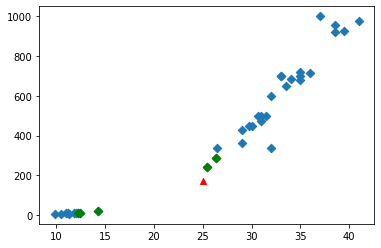

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(train_features[:,1],train_features[:,0],marker='D')

plt.scatter([25],[170], marker='^', color='red')
for idx in indexes :
    plt.scatter(train_features[idx][1],train_features[idx][0], marker='D', color='green')
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler()
train_features_scaled = feature_scaler.fit_transform(train_features)
test_features_scaled = feature_scaler.transform(test_features)

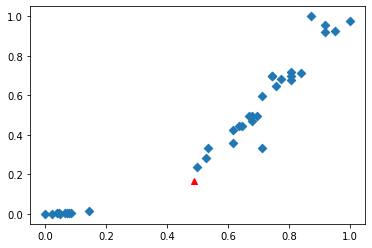

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(train_features_scaled[:,1],train_features_scaled[:,0],marker='D')
outlier = feature_scaler.transform([[170,25]])[0]
plt.scatter([outlier[1]],[outlier[0]], marker='^', color='red')
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_features_scaled, train_target)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(test_features_scaled)

In [37]:
print(y_pred)

[0 0 0 1 1 0 1 0 1 0 0 0 0]


In [38]:
print(test_target.values.reshape(-1))

[0 0 0 1 1 0 1 0 1 0 0 0 0]


In [39]:
from sklearn.metrics import accuracy_score

print('Accuracy :',accuracy_score(test_target,y_pred))

Accuracy : 1.0


In [40]:
distances, indexes = knn.kneighbors([[outlier[0],outlier[1]]])

In [41]:
indexes = indexes.reshape(-1)

In [42]:
distances

array([[0.0736107 , 0.12779291, 0.17777114, 0.23278693, 0.28218458]])

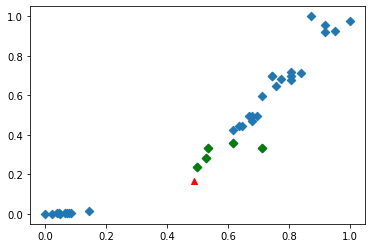

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(train_features_scaled[:,1],train_features_scaled[:,0],marker='D')
outlier = feature_scaler.transform([[170,25]])[0]
plt.scatter([outlier[1]],[outlier[0]], marker='^', color='red')
for idx in indexes :
    plt.scatter(train_features_scaled[idx][1],train_features_scaled[idx][0], marker='D', color='green')
plt.show()